In [16]:
from matplotlib import pyplot as pyp
import numpy as np

Cargamos los datos en una lista que luego graficaremos, y creamos nuestra matriz A y vector b para la ecuación Ax = b, la cual queremos minimizar. 

In [17]:
vectores = list()
ruta = "P1grupo_8.csv"
with open(ruta, "r") as archivo:
    archivo = archivo.readlines()[1:]
    for dato in archivo:
        dato = dato.rstrip("\n")
        dato = dato.split(",")
        x = float(dato[0])
        y = float(dato[1])
        vectores.append((x,y))

A = []
b = []
for vector in vectores:
    x = vector[0]
    X_n = [x ** 2, x, 1]
    A.append(X_n)

    Y_n = vector[1]
    b.append(Y_n)

A = np.array(A) #Matriz 1000*2
b = np.array(b) #vector largo 1000


Grafico de la data inicial

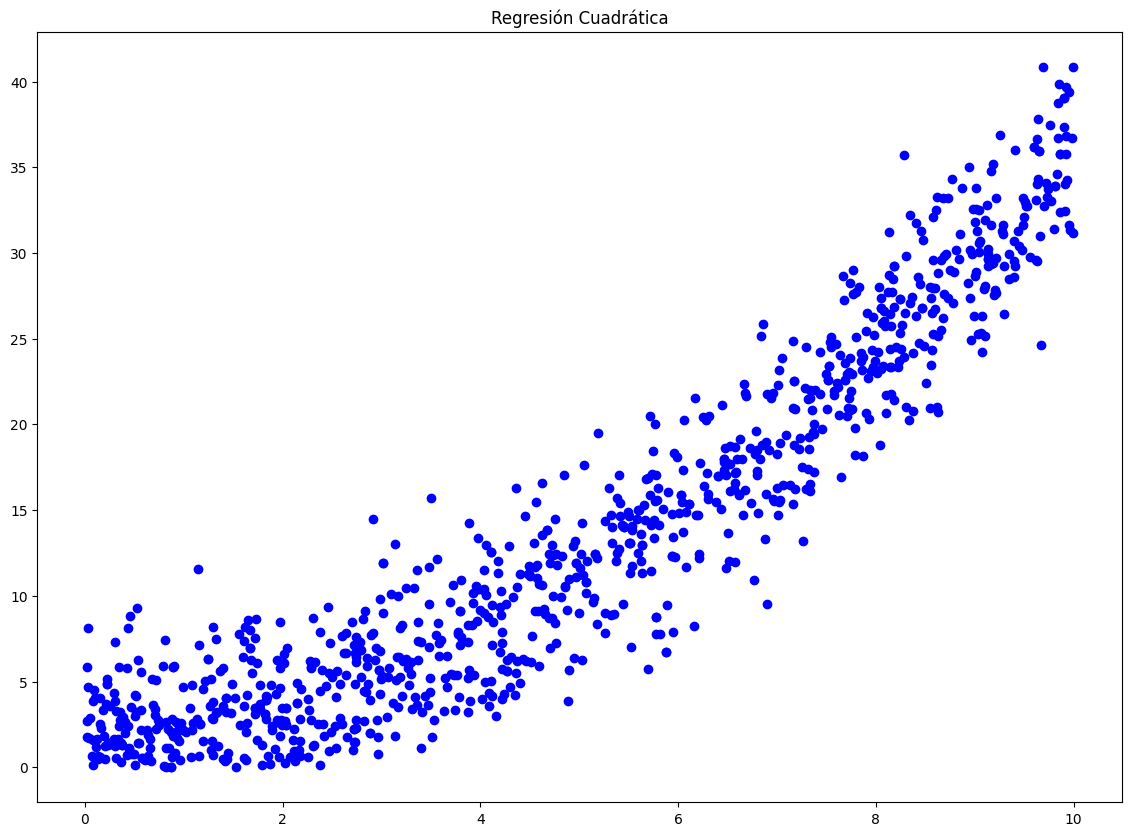

In [18]:
# f_x = np.linspace(0, 10, 100): graficaremos la función para valores de x entre 0 y 10.
# f_y = (f_x * B_2) ** 2 + (f_x * B_1) + B_0, con (B_2, B_1, B_0) = X_a a calcular.

fig, ax = pyp.subplots(1, 1, figsize = (14, 10))
ax.set_title("Regresión Cuadrática")

for vector in vectores:
    x = vector[0]
    y = vector[1]
    ax.scatter(x, y, marker = "o", color = "blue")

# ax.plot(f_x, f_y, 'r' ): con esto ploteamos la función cuando tengamos los coeficientes.


Usamos $f(x) = {||Ax - b||_2}^2$ y buscamos minimizar $f: {R}^{3} \longrightarrow R$.

Vemos que $f = g \circ h$.

con $h: R^{3} \longrightarrow R^{1000}$ : $x \longmapsto{Ax-b}$

y $g: R^{1000} \longrightarrow R$ : $x \longmapsto{||x||_2}^2$

 Por regla de la cadena: $\nabla{f(x)} = \nabla{g(h(x))} Dh(x)$

 Tenemos que $\nabla{g(x)} = 2x^T$ $\wedge$ $Dh(x) = A$

 Por tanto, $\nabla{f(x)} = 2(Ax-b)^TA$

 Buscamos $\nabla{f(x)} = 0$ para hallar el mínimo, por lo que buscamos $(Ax-b)^TA = 0$

 Como $A^T \in M_{3x1000}$ y $A \in M_{1000x3}$, entonces $A^TA \in M_{3x3}$ y por tanto es invertible.

 Sabiendo esto llegamos a que $x = (A^TA)^{-1}A^Tb$

 Implementamos este proceso computacional teniendo A y b:

 

In [37]:
ATA = np.dot(A.T, A)
ATA_inv = np.linalg.inv(ATA)
ATb = np.dot(A.T, b)
x = np.dot(ATA_inv, ATb)
B_2 = x[0]
B_1 = x[1]
B_0 = x[2]



siendo x los coeficientes que necesitamos para nuestra regresión cuadrática, podemos ahora graficar.

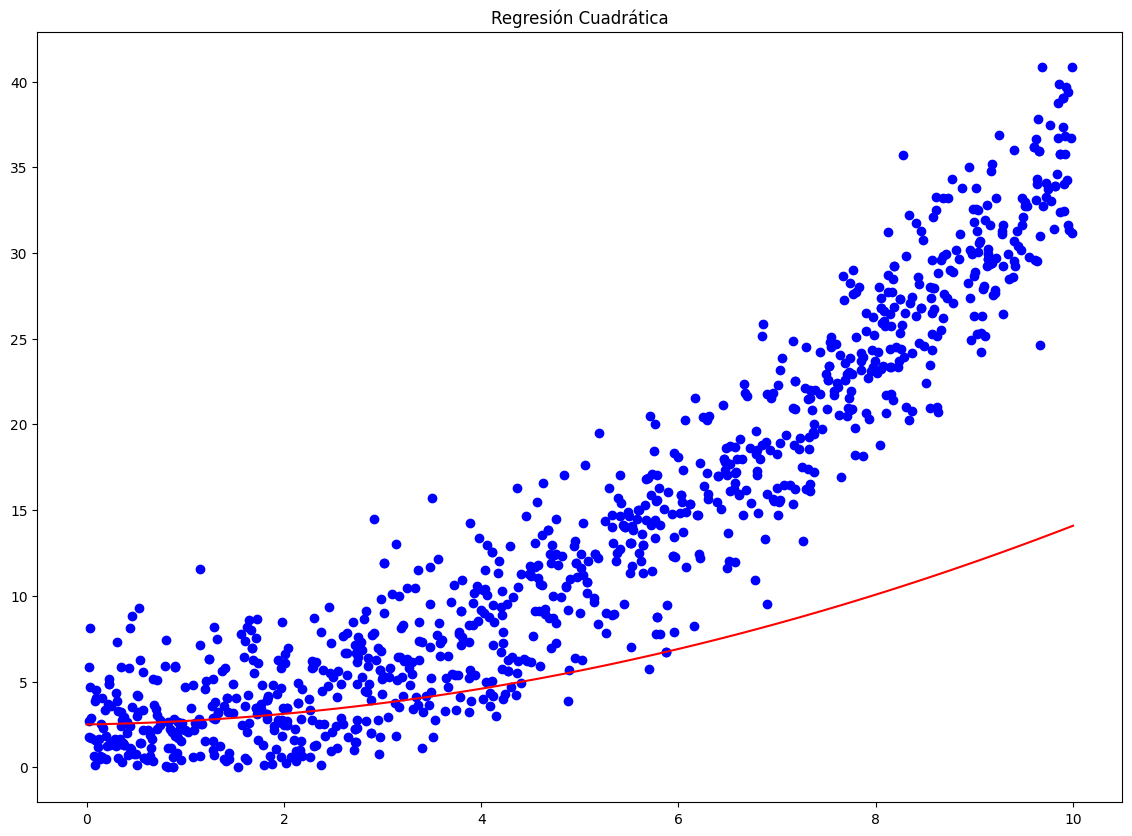

In [38]:
f_x = np.linspace(0, 10, 100) #graficaremos la función para valores de x entre 0 y 10.
f_y = (f_x * B_2) ** 2 + (f_x * B_1) + B_0

fig, ax = pyp.subplots(1, 1, figsize = (14, 10))
ax.set_title("Regresión Cuadrática")

for vector in vectores:
    x = vector[0]
    y = vector[1]
    ax.scatter(x, y, marker = "o", color = "blue")

ax.plot(f_x, f_y, 'r' ) #con esto ploteamos la función cuando tengamos los coeficientes.

No sé q es esto xd

In [14]:
#Usando minimos cuadrados
#falta pasarlo a matriz y calcular
N = len(vectores)
X = 0
Y = 0
X2 = 0
X3 = 0
X4 = 0
XY = 0
X2Y = 0


for vector in vectores:
    x = vector[0]
    y = vector[1]
    X += (x)
    Y += (y)
    X2 += (x ** 2)
    X3 += (x ** 3)
    X4 += (x ** 4)
    XY += (x * y)
    X2Y += ((X ** 2) * y)
   

A = np.array([[N, X, X2], [X, X2, X3], [X2, X3, X4]])
b = np.array([Y, XY, X2Y])
    
print(b, "\n")

if np.linalg.det(A) == 0:
    x = None
    print("No se puede resolver")
else:
    x = (A**-1) * b

print(A * x)


[1.36053933e+04 9.54988497e+04 1.24192998e+11] 

[[1.36053933e+04 9.54988497e+04 1.24192998e+11]
 [1.36053933e+04 9.54988497e+04 1.24192998e+11]
 [1.36053933e+04 9.54988497e+04 1.24192998e+11]]
